# Quick example to fit a baseline


In [1]:
%pylab inline
import sys
sys.path.append("../")
import numpy as np
import scipy
from matplotlib import pyplot as plt

import rampy
from sklearn import preprocessing

Populating the interactive namespace from numpy and matplotlib


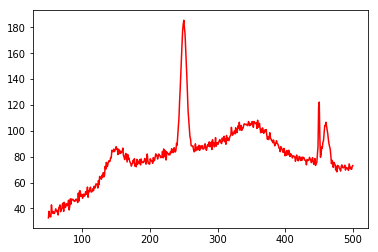

In [2]:
nb_points  =500
x = np.linspace(50, 500, nb_points)

# gaussian peaks
p1 = 20.0 * np.exp(-np.log(2) * ((x-150.0)/15.0)**2)
p2 = 100.0 * np.exp(-np.log(2) * ((x-250.0)/5.0)**2)
p3 = 50.0 * np.exp(-np.log(2) * ((x-450.0)/1.0)**2)
p4 = 20.0 * np.exp(-np.log(2) * ((x-350.0)/30.0)**2)
p5 = 30.0 * np.exp(-np.log(2) * ((x-460.0)/5.0)**2)

# background: a large gaussian + linear 
bkg = 60.0 * np.exp(-np.log(2) * ((x-250.0)/200.0)**2) + 0.1*x

#noise
noise = 2.0 * np.random.normal(size=nb_points)

#observation
y = p1 + p2 + p3 + p4 + p5 + noise +bkg

plot(x,y,"r-")

# Different baseline examples

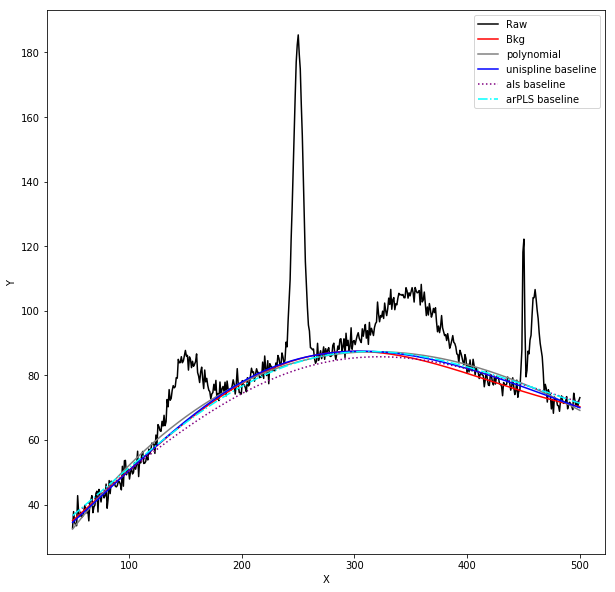

In [3]:
# need to define some fitting regions for the spline
roi = np.array([[0,100],[200,220],[280, 290],[420,430],[480,500]])

# calculating the baselines
ycalc_poly, base_poly = rampy.baseline(x,y,roi,'poly',polynomial_order=3 )
#ycalc_gcvspl, base_gcvspl = rampy.baseline(x,y,roi,'gcvspline',s=0.1 ) # activate if you have installed gcvspline
ycalc_uni, base_uni = rampy.baseline(x,y,roi,'unispline',s=1e0)
ycalc_als, base_als = rampy.baseline(x,y,roi,'als',lam=10**7,p=0.05)
ycalc_arpls, base_arpsl = rampy.baseline(x,y,roi,'arPLS',lam=10**7,ratio=0.0001)

# doing the figure
figure(figsize=(10,10))
plot(x,y,"k-",label="Raw")
plot(x,bkg,"r-",label="Bkg")

plot(x,base_poly,"-",color="grey",label="polynomial")
plot(x,base_uni,"b-",label="unispline baseline")
#plot(x,base_gcvspl,"-",color="orange",label="gcvspline baseline") # activate if you have installed gcvspline
plot(x,base_als,":",color="purple",label="als baseline")
plot(x,base_arpsl,"-.",color="cyan",label="arPLS baseline")

xlabel("X")
ylabel("Y")

legend()

/home/charles/py36/py36/lib/python3.6/site-packages/rampy/baseline.py:226: RuntimeWarning: overflow encountered in exp
  wt = 1.0/(1 + np.exp( 2* (d-(2*s-m))/s ) )


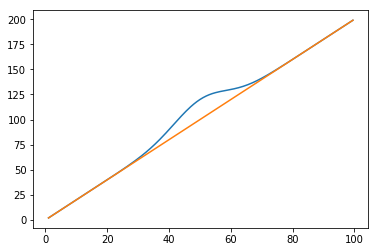

In [4]:
x2 = np.arange(1,100,0.5)
y2 = 2*x2 + 20.0 * np.exp(-np.log(2) * ((x2-50.0)/10.0)**2)

# need to define some fitting regions for the spline
roi2 = np.array([[1,30],[80,100]])

# calculating the baselines
ycalc1, base1 = rampy.baseline(x2,y2,roi2,'poly',polynomial_order=1)
#ycalc2, base2 = rampy.baseline(x2,y2,roi2,'gcvspline',s=0.1 ) # activate if you have installed gcvspline
ycalc3, base3 = rampy.baseline(x2,y2,roi2,'unispline',s=1e0)
ycalc4, base4 = rampy.baseline(x2,y2,roi2,'als',lam=10**7,p=0.05)
ycalc5, base5 = rampy.baseline(x2,y2,roi2,'arPLS',lam=10**7,ratio=0.1)

plot(x2,y2)
plot(x2,base5)

In [5]:
help(rampy.baseline)

Help on function baseline in module rampy.baseline:

baseline(x_input, y_input, bir, method, **kwargs)
    Allows subtracting a baseline under a x y spectrum.
    
    Parameters
    ----------
    x_input
        Array with x values.
    y_input
        Array with y values.
    bir
        An Array containing the regions of interest, organised per line. for instance, roi = np.array([[100., 200.],[500.,600.]]) will define roi between 100 and 200 as well as between 500 and 600,.
    methods
        "poly": polynomial fitting, with splinesmooth the degree of the polynomial.
        "unispline": spline with the UnivariateSpline function of Scipy, splinesmooth is the spline smoothing factor (assume equal weight in the present case);
        "gcvspline": spline with the gcvspl.f algorythm, really robust. Spectra must have x, y, ese in it, and splinesmooth is the smoothing factor;
        for gcvspline, if ese are not provided we assume ese = sqrt(y). Requires the installation of gcvspline w